<h1>Overview


Nama : Rofik Hidayat

Kode : PYTN-KS03-007 

# Final Project 1

Tujuan final project :
* Mampu memahami konsep regression dengan Linear Regression
* Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
* Mampu mengimplementasikan Linear Regression untuk membuat prediksi

Dataset yang digunakan yaitu dataset publik Uber and Lyft Dataset Boston, MA yang terdapat pada Website kaggle pada link berikut https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma. 

Dataset tersebut memiliki memiliki 57 atribut, dan memiliki jumlah total 693.071 data. Dataset ini nantinya akan dilakukan pemilihan attribut attribut yang sesuai dan berkorelasi untuk digunakan dalam membuat model Linear Regression.

**Project ini di jalankan dan diujicoba di Google Colabs**




#Mendownload Dataset dari Kaggle ke Google Colab


In [73]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [75]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [76]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

uber-and-lyft-dataset-boston-ma.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir dataset
!unzip ./uber-and-lyft-dataset-boston-ma.zip -d ./dataset
!ls -l ./dataset

<h1>Import Library

In [78]:
import numpy as np
import pandas as pd

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
%matplotlib inline

<h1>Load Dataset

In [80]:
df_rideshare = pd.read_csv("./dataset/rideshare_kaggle.csv")
df_rideshare.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


<h1>Data Cleaning

In [81]:
df_rideshare.shape

(693071, 57)

Menghapus variable variable yang tidak dibutuhkan

In [82]:
df = df_rideshare.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude'],axis = 1)
df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


<h1>temp dengan price

In [83]:
df_temp_price = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
df_temp_price.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


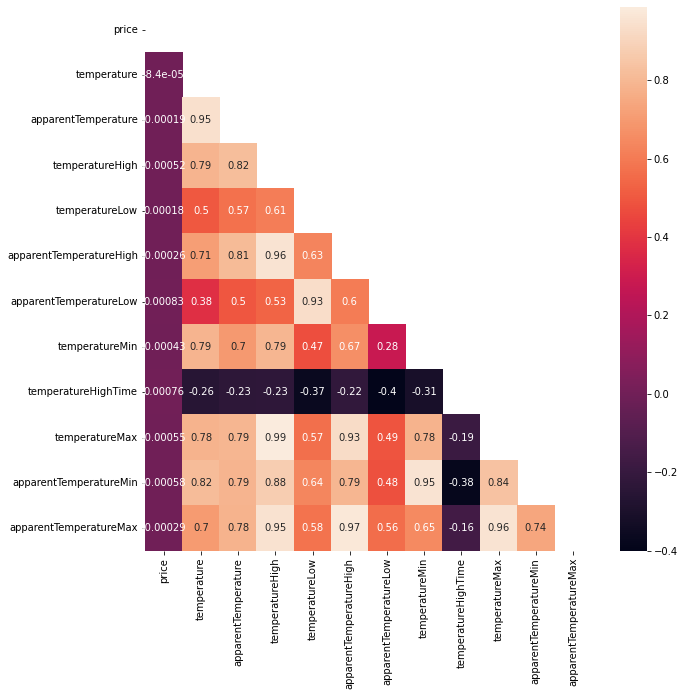

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df_temp_price.corr(),annot=True, mask=np.triu(df_temp_price.corr()))

Dari heatmap dapat diketahui bahwa antara variabel Price tidak memiliki korelasi dengan variabel-variabel Temperature karena nilai korelasinya negatif dan ada juga yang hampir 0. Sehingga variable tersebut di drop

In [85]:
df_temp_price = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
df = df.drop(df_temp_price.columns,axis=1)
df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<h1>Categorical data

Mencari data data Categorical

In [86]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
category_col = df[category_col]
category_col.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


In [87]:
category_col.nunique()

timezone          1
source           12
destination      12
cab_type          2
product_id       13
name             13
short_summary     9
icon              7
dtype: int64

In [88]:
for col in category_col:
    print(f'{col} :{category_col[col].unique()}')
    print()

timezone :['America/New_York']

source :['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination :['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type :['Lyft' 'Uber']

product_id :['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name :['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary :[' Mostly C

In [89]:
category_col['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [90]:
df = df.drop(['timezone','product_id'], axis=1)
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<h1>Num Colom

In [91]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = df[num_cols]
num_cols.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax'],
      dtype='object')

<h1>Climate dengan Price

In [92]:
climate_cols = ['price','precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax',]
climate_data = df[climate_cols]
climate_data.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


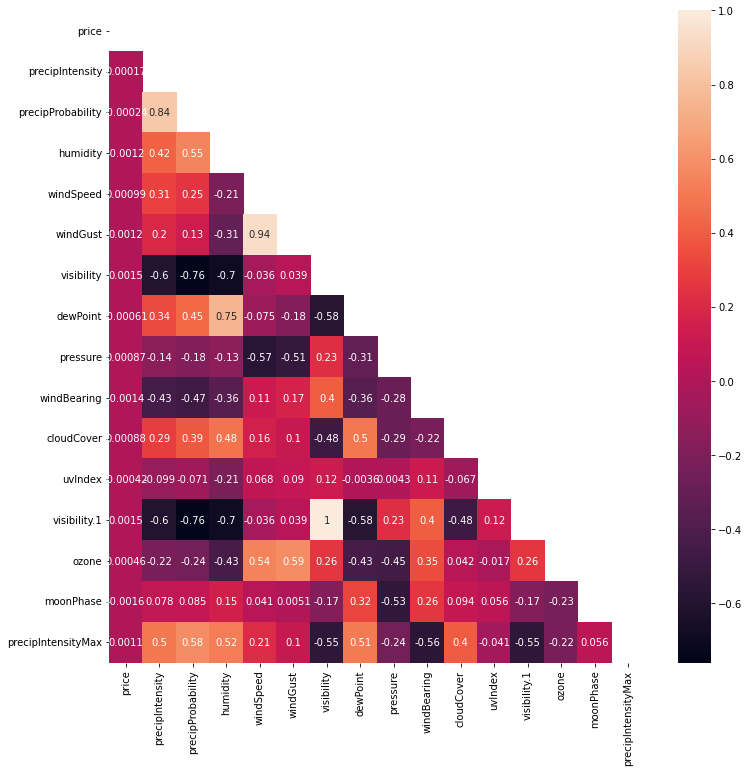

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(climate_data.corr(),annot=True, mask=np.triu(climate_data.corr()))

Dari heatmap dapat diketahui bahwa antara variabel Price tidak memiliki korelasi dengan variabel-variabel Climate karena nilai korelasinya negatif dan ada juga yang hampir 0. Sehingga variable tersebut di drop

In [94]:
df = df.drop(climate_cols[1::], axis=1)
print(df.shape)
df.head()

(693071, 12)


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


<h1>Preprocessing

In [95]:
from sklearn.preprocessing import OneHotEncoder
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
print(category_col)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [96]:
for col in category_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    df = df.drop(col, axis=1)
    df = pd.concat([df, enc_df], axis=1)
  
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

,hour,day,month,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Data tersebut merupakan gabungan dari dataframe dengan data categorical yang telah dilakukan encoding menggunakan OneHotEncoder

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 61 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   hour                                 693071 non-null  int64  
 1   day                                  693071 non-null  int64  
 2   month                                693071 non-null  int64  
 3   price                                637976 non-null  float64
 4   distance                             693071 non-null  float64
 5   surge_multiplier                     693071 non-null  float64
 6   source_Back Bay                      693071 non-null  float64
 7   source_Beacon Hill                   693071 non-null  float64
 8   source_Boston University             693071 non-null  float64
 9   source_Fenway                        693071 non-null  float64
 10  source_Financial District            693071 non-null  float64
 11  source_Haymar

<h1>Source dengan Price

In [98]:
src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
src_data = df[src_col]
src_data.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


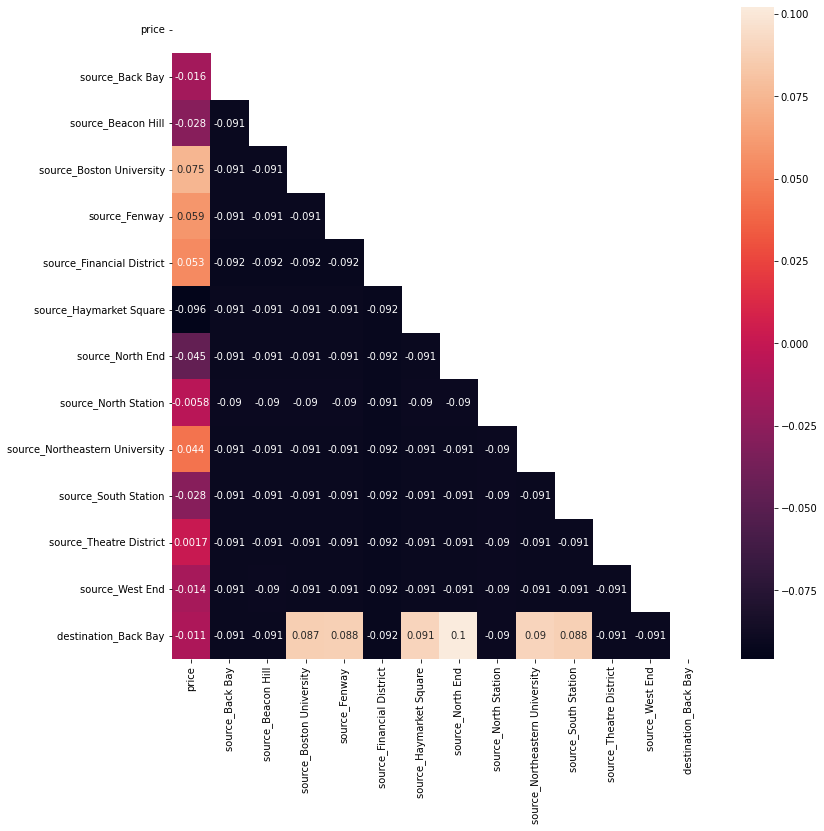

In [99]:
plt.figure(figsize=(12,12))
sns.heatmap(src_data.corr(),annot=True, mask=np.triu(src_data.corr()))

Dari heatmap dapat diketahui bahwa antara variabel Price tidak memiliki korelasi dengan variabel-variabel Source karena nilai korelasinya negatif dan ada juga yang hampir 0. Sehingga variable tersebut di drop

In [100]:
src_cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End']
df = df.drop(src_cols,axis=1)

In [101]:
print(df.shape)
df.head()

(693071, 49)


,hour,day,month,price,distance,surge_multiplier,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h1>Destination dengan Price

In [102]:
dst_col = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data_dst = df[dst_col]
data_dst.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


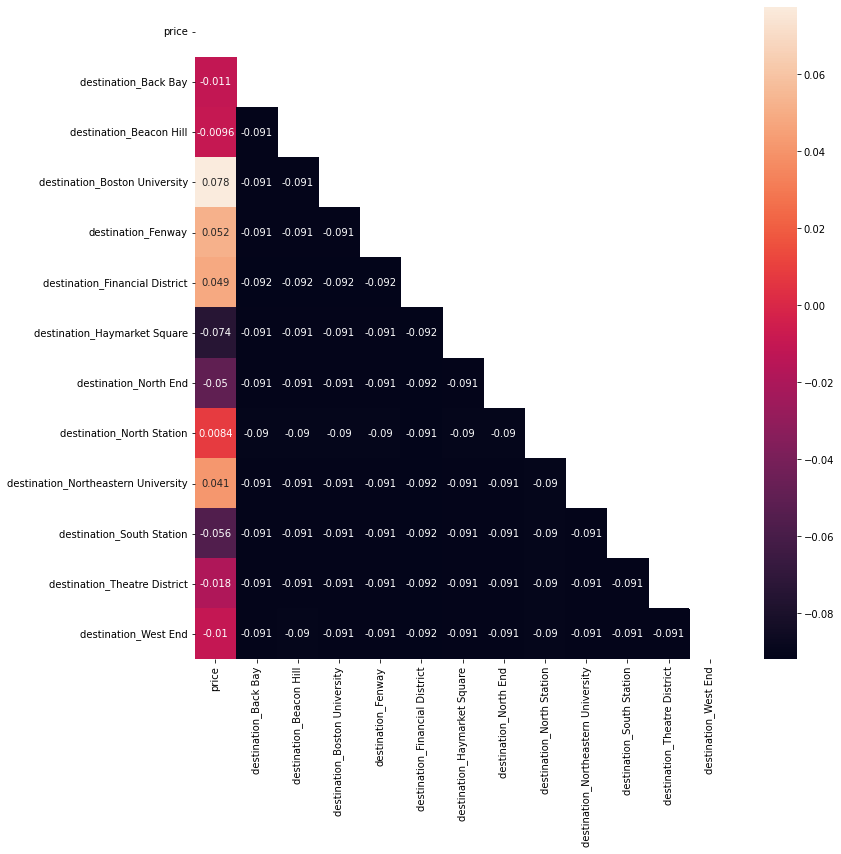

In [103]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dst.corr(),annot=True, mask=np.triu(data_dst.corr()))

Dari heatmap dapat diketahui bahwa antara variabel Price tidak memiliki korelasi dengan variabel-variabel Destination karena nilai korelasinya negatif dan ada juga yang hampir 0. Sehingga variable tersebut di drop

In [104]:
dst_cols = ['destination_Back Bay','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
df = df.drop(dst_cols,axis=1)

In [105]:
print(df.shape)
df.head()

(693071, 37)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h1>Summary

In [106]:
summ_cols = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data_summ = df[summ_cols]
data_summ.head()

,price,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,short_summary_ Clear
0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


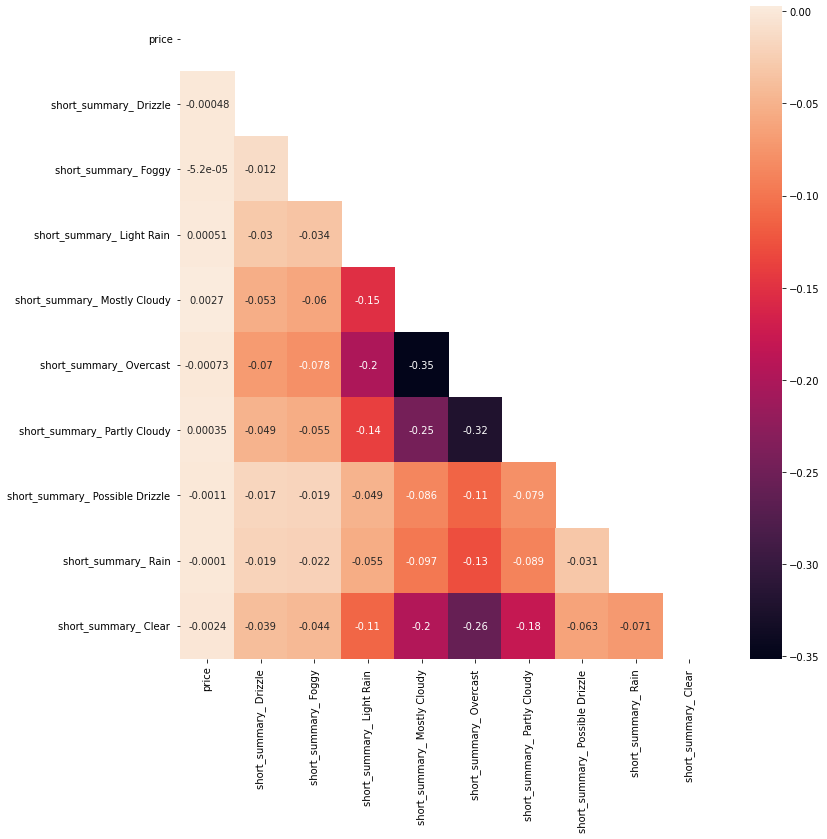

In [107]:
plt.figure(figsize=(12,12))
sns.heatmap(data_summ.corr(),annot=True, mask=np.triu(data_summ.corr()))

Dari heatmap dapat diketahui bahwa antara variabel Price tidak memiliki korelasi dengan variabel-variabel sumary karena nilai korelasinya negatif dan ada juga yang hampir 0. Sehingga variable tersebut di drop

In [108]:
summ_cols = ['short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
df = df.drop(summ_cols,axis=1)

In [109]:
print(df.shape)
df.head()

(693071, 28)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h1>ICON

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   hour                        693071 non-null  int64  
 1   day                         693071 non-null  int64  
 2   month                       693071 non-null  int64  
 3   price                       637976 non-null  float64
 4   distance                    693071 non-null  float64
 5   surge_multiplier            693071 non-null  float64
 6   cab_type_Lyft               693071 non-null  float64
 7   cab_type_Uber               693071 non-null  float64
 8   name_Black                  693071 non-null  float64
 9   name_Black SUV              693071 non-null  float64
 10  name_Lux                    693071 non-null  float64
 11  name_Lux Black              693071 non-null  float64
 12  name_Lux Black XL           693071 non-null  float64
 13  name_Lyft     

In [111]:
ico_cols = ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data_ico = df[ico_cols]
data_ico.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


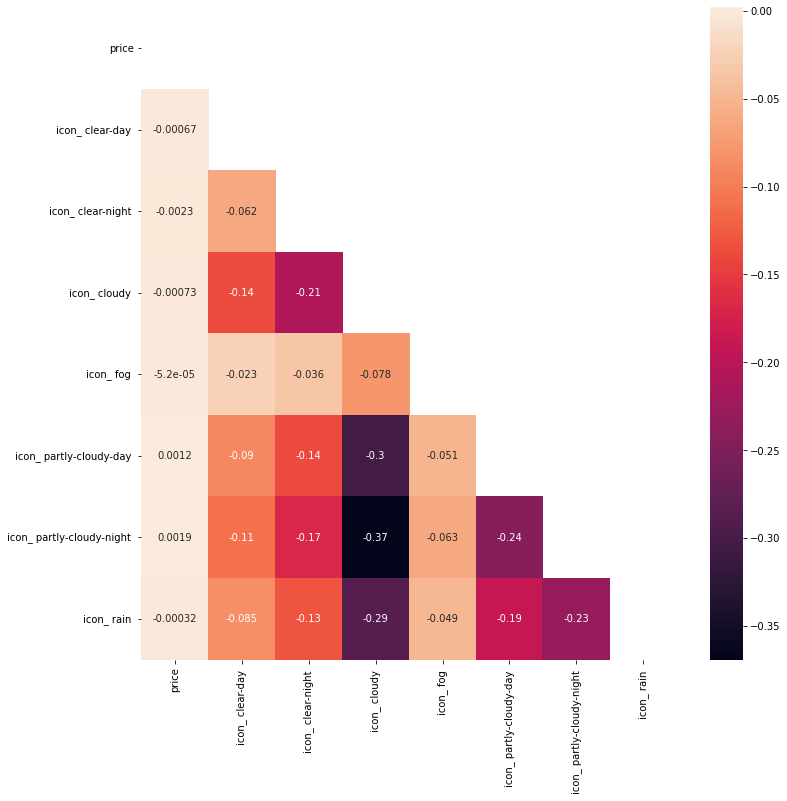

In [112]:
plt.figure(figsize=(12,12))
sns.heatmap(data_ico.corr(),annot=True, mask=np.triu(data_ico.corr()))

kolom summary dan kolom icon tidak ada pengaruh ke price karena nilai korelasi mereka terlalu rendah sehingga harus drop kolom kolom tersebut

In [113]:
ico_cols = ['icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
df = df.drop(ico_cols,axis=1)

In [114]:
print(df.shape)
df.head()

(693071, 21)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Name dengan Price

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hour               693071 non-null  int64  
 1   day                693071 non-null  int64  
 2   month              693071 non-null  int64  
 3   price              637976 non-null  float64
 4   distance           693071 non-null  float64
 5   surge_multiplier   693071 non-null  float64
 6   cab_type_Lyft      693071 non-null  float64
 7   cab_type_Uber      693071 non-null  float64
 8   name_Black         693071 non-null  float64
 9   name_Black SUV     693071 non-null  float64
 10  name_Lux           693071 non-null  float64
 11  name_Lux Black     693071 non-null  float64
 12  name_Lux Black XL  693071 non-null  float64
 13  name_Lyft          693071 non-null  float64
 14  name_Lyft XL       693071 non-null  float64
 15  name_Shared        693071 non-null  float64
 16  na

In [116]:

name_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV','name_Taxi']
data_name = df[name_cols]
data_name.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,name_Taxi
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


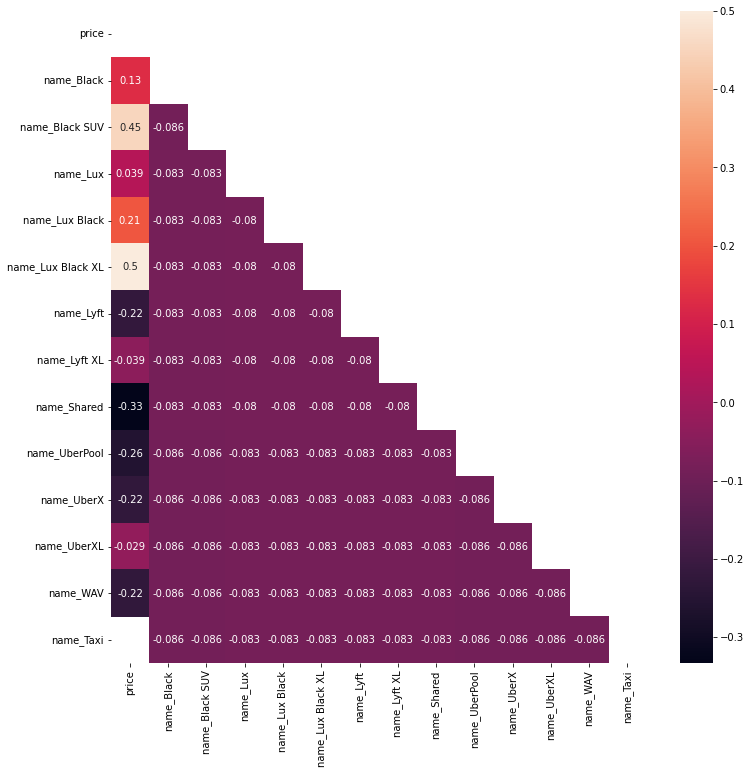

In [117]:
plt.figure(figsize=(12,12))
sns.heatmap(data_name.corr(),annot=True, mask=np.triu(data_name.corr()))

Beberapa variable name memiliki pengaruh positif dengan variabel price.

In [118]:
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
data_rem = df[rem_cols]
data_rem.head()

,price,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,5.0,9,16,12,0.44,1.0,1.0,0.0
1,11.0,2,27,11,0.44,1.0,1.0,0.0
2,7.0,1,28,11,0.44,1.0,1.0,0.0
3,26.0,4,30,11,0.44,1.0,1.0,0.0
4,9.0,3,29,11,0.44,1.0,1.0,0.0


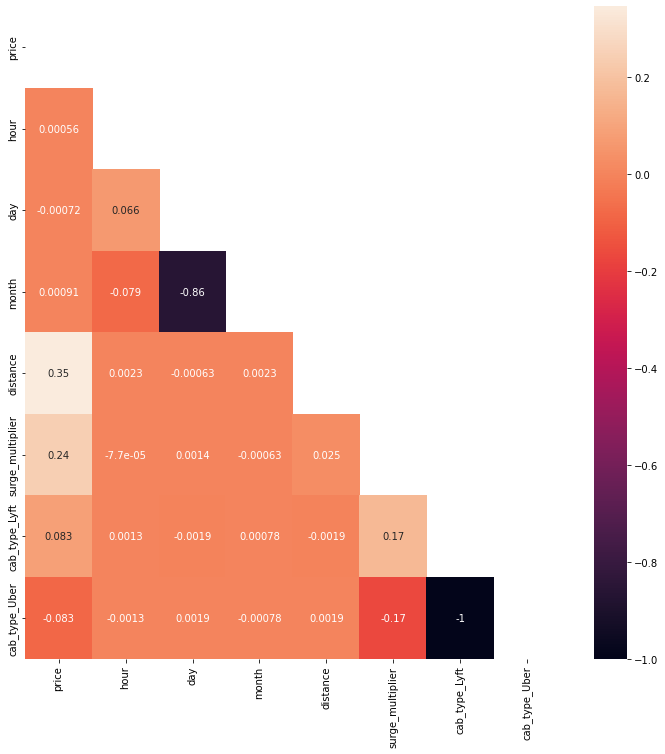

In [119]:
plt.figure(figsize=(12,12))
sns.heatmap(data_rem.corr(),annot=True, mask=np.triu(data_rem.corr()))

dari hasil Heatmap dapat diketahui bahwa fitur hour, day, month memiliki korelasi yang rendah. tetapi, kolom distance dan surge_multiplier memiliki korelasi yang bagus dengan price. Sehingga fitur hour, day, month akan di drop

In [120]:
df = df.drop(['month','day','hour'],axis=1)
print(df.shape)
df.head()

(693071, 18)


,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
df.isnull().sum()

price                55095
distance                 0
surge_multiplier         0
cab_type_Lyft            0
cab_type_Uber            0
name_Black               0
name_Black SUV           0
name_Lux                 0
name_Lux Black           0
name_Lux Black XL        0
name_Lyft                0
name_Lyft XL             0
name_Shared              0
name_Taxi                0
name_UberPool            0
name_UberX               0
name_UberXL              0
name_WAV                 0
dtype: int64

In [123]:
df = df.dropna(subset = ['price']).reset_index()

In [124]:
df.shape
df.isnull().sum()

index                0
price                0
distance             0
surge_multiplier     0
cab_type_Lyft        0
cab_type_Uber        0
name_Black           0
name_Black SUV       0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
name_Lyft            0
name_Lyft XL         0
name_Shared          0
name_Taxi            0
name_UberPool        0
name_UberX           0
name_UberXL          0
name_WAV             0
dtype: int64

<h1>Outliner

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


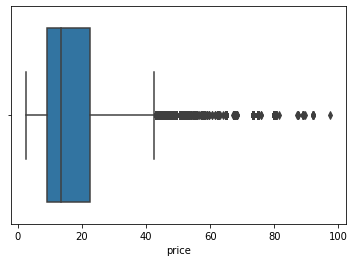

In [125]:
sns.boxplot(df['price'])

Dari image box plot dapat diketahui bahwa terdapat banyak outliners, sehingga perlu dibersihkan agar model nantinya memiliki kinerja dengan baik

In [126]:
max_threshold = df['price'].quantile(0.99)
max_threshold

42.5

In [127]:
df[df['price']>max_threshold]

,index,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
645,706,52.5,3.25,2.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,707,67.5,3.25,2.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,769,45.5,4.76,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,1094,45.5,4.31,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,1318,45.5,5.33,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,692439,47.0,5.56,1.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637637,692698,52.5,4.58,1.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637813,692891,47.5,5.42,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637878,692962,51.0,7.36,1.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
outliners = np.where(df['price']>42.5)
print(outliners[0])
print(np.count_nonzero(np.where(df['price']>42.5)))

[   645    646    706 ... 637813 637878 637917]
5589


In [129]:
df.drop(outliers[0], inplace=True)
df.shape

(632387, 19)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


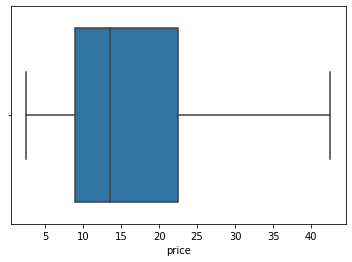

In [130]:
sns.boxplot(df['price'])

Box Plot yang sudah dibersihkan dari outliners

In [131]:
feature = df[['price','distance','surge_multiplier']]
feature.head()

,price,distance,surge_multiplier
0,5.0,0.44,1.0
1,11.0,0.44,1.0
2,7.0,0.44,1.0
3,26.0,0.44,1.0
4,9.0,0.44,1.0


In [132]:
feature.describe()

,price,distance,surge_multiplier
count,632387.000000,632387.000000,632387.000000
mean,16.245314,2.172208,1.012224
std,8.769536,1.116478,0.083163
min,2.500000,0.020000,1.000000
25%,9.000000,1.270000,1.000000
50%,13.500000,2.140000,1.000000
75%,22.500000,2.900000,1.000000
max,42.500000,7.860000,3.000000


# Statistik
* Variable Distance memiliki rata rata 2,17 dengan jarak terdekatnya 0.02 dan jarak terjauh 7,86
* variable surge_multiplier memiliki rentang 1-3 dan memiliki rata rata 1


In [133]:
feature.corr()

,price,distance,surge_multiplier
price,1.000000,0.318671,0.141238
distance,0.318671,1.000000,0.007419
surge_multiplier,0.141238,0.007419,1.000000


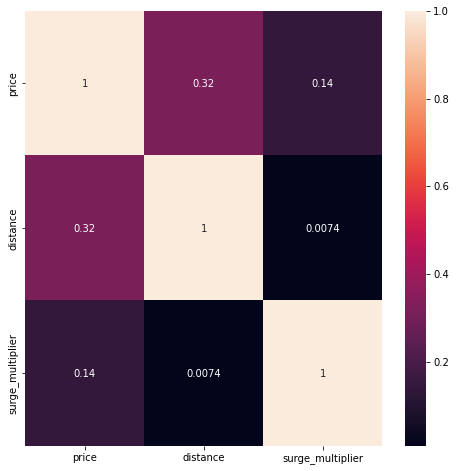

In [134]:
new_data = df[feature.columns]
plt.figure(figsize=(8,8))
sns.heatmap(new_data.corr(), annot=True)

Berdasarkan heatmap dapat disimpulkan bahwa :
* variabel distance dan surge multiplier memiliki korelasi positif dengan variabel price dengan nilai 0.32 dan 0.14 
* Variabel distance dan surge multiplier mempengaruhi price

# Pendefinisian dan Pelatihan Model
Setelah dilakukan proses data cleaning dan preprocessing maka diperoleh data yang nantinya digunakan untuk membuat model. Untuk membuat model data di split menjadi data training dan testing dengan ratio 70:30. Setelah dilakukan split maka data akan dilakukan proses pelatihan.

In [135]:
df.head()

,index,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
from sklearn.model_selection import train_test_split
y = df['price'].values
X = df.drop(columns=['index','price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [137]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train,y_train)
ypred = model.predict(X_test)
print('predict:', ypred)

predict: [30.91113281 22.76171875 18.61328125 ... 17.68359375 10.48242188
 11.84570312]


# Evaluasi Model
Untuk mengetahui apakah model memberikan hasil prediksi yang baik 

In [138]:
print('intercept:', model.intercept_)

intercept: 8085924076650.293


In [139]:
#cek nilai R2 untuk linear regression
from sklearn import metrics
metrics.r2_score(y_test, ypred)

0.933541767231276

In [140]:
mse = metrics.mean_squared_error(y_test,ypred)
mse

5.1275692434521085

In [141]:
mae = metrics.mean_absolute_error(y_test, ypred)
mae

1.6790186151445312

In [142]:
import pickle
pickle.dump(model, open('./predict_price_model.pkl','wb'))

# Kesimpulan 
1. Tujuan Project ini untuk memprediksi harga tarif taxi Uber dan Lyft dengan menggunakan Dataset berdimensi 693071 × 57.

2. Dengan banyaknya fitur yang ada maka harus di lakukan pemilihan fitur menggunakan fungsi correlation dan juga bantuan visualisasi dari heatmap plot.

3. Variabel name yang merupakan data category perlu dilakukan OneHotEncoding sehingga terbagi menjadi beberapa kolom yaitu 'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV'

4. Variabel distance dan surge multiplier merupakan variable paling berpengaruh terhadap Price dengan nilai koreasi sebesar 0.32 dan 0.14

5. Dalam pembuatan model prediksi, projek ini menggunakan algoritma Linear Regression.

6. Untuk menilai kinerja dan performa dari model menggunakan R2 score, MSE, MAE
dengan masing masing memiliki nilai 0.93, 5.12, 1.6

7. Berdasarkan hasil evaluasi dari nilai R2 score, MSE, MAE maka model dapat memprediksi dengan baik.
